<a href="https://colab.research.google.com/github/losornom-spec/POO-2025-2/blob/main/Acitividad_3_POO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @title
import base64
from IPython.display import display, HTML

with open("logo.png", "rb") as image_file:
    encoded_image = base64.b64encode(image_file.read()).decode()

html_code = f"""
<style>
  @page {{
    size: A4;
    margin: 0;
  }}
  body, html {{
    margin: 0;
    padding: 0;
    height: 100%;
    width: 100%;
  }}

  .cover {{
    height: 50cm;
    width: 100%;
    box-sizing: border-box;
    font-family: Arial, sans-serif;
    text-align: center;
    display: flex;
    flex-direction: column;
    justify-content: space-between;
    padding-top: 3cm;
    padding-bottom: 3cm;
  }}

  .section {{
    max-width: 17cm;
    margin-left: auto;
    margin-right: auto;
  }}

  .cover img {{
    width: 120px;
    margin-bottom: 20px;
  }}

  h1 {{
    font-size: 24pt;
    margin: 10px 0;
  }}

  h2 {{
    font-size: 20pt;
    margin: 10px 0;
  }}

  h3 {{
    font-size: 16pt;
    margin: 5px 0;
  }}

  p {{
    line-height: 1.6;
    font-size: 12pt;
    margin: 5px 0;
  }}
</style>

<div class="cover">
  <div class="section">
    <img src="data:image/png;base64,{encoded_image}" alt="Logo UNAL">
    <h1>UNIVERSIDAD NACIONAL DE COLOMBIA</h1>
    <h3>PREGRADO EN ESTADÍSTICA</h3>
    <p>Departamento de Estadística<br>Facultad de Ciencias</p>
  </div>

  <div class="section">
    <h2>Programación orientada a objetos</h2>
    <h3><i>Actividad 3</i></h3>
  </div>

  <div class="section">
    <p><strong>Estudiante:</strong><br>
    Luis Gabriel Osorno Muñoz – C.C. 1040976099<br>
    losornom@unal.edu.co</p>
  </div>

  <div class="section">
    <p><strong>Medellín, Colombia</strong><br>
    <strong>Octubre 14 de 2025</strong></p>
  </div>
</div>
"""

display(HTML(html_code))

FileNotFoundError: [Errno 2] No such file or directory: 'logo.png'

# Ejercicio 8.2 pagina 483 (Texto: Ejercicios de programación)

**Enunciado: Notas**

Se requiere desarrollar un programa con interfaz gráfica de usuario que genere una ventana donde se solicite el ingreso de cinco notas obtenidas por un estudiante.

El programa debe calcular y mostrar en la parte inferior de la ventana los siguientes datos:

- El promedio de notas ingresadas.

- La desviación estándar de las notas ingresadas.

- La mayor nota obtenida.

- La menor nota obtenida.

In [ ]:
# -----------------------------------------------------------------
# Clase: Notas
# 1. En esta clase se crean las funciones que se requieren y se
#    importan los modulos que se requieren
# -----------------------------------------------------------------

import ipywidgets as widgets
from IPython.display import display, HTML
import numpy as np
import base64

class Notas:
    def __init__(self, lista_notas):
        self.lista_notas = np.array(lista_notas)

    def calcular_promedio(self):
        """Calcula el promedio de las notas."""
        return np.mean(self.lista_notas)

    def calcular_desviacion_estandar(self):
        """Calcula la desviación estándar de las notas."""
        return np.std(self.lista_notas)

    def obtener_nota_mayor(self):
        """Obtiene la nota más alta."""
        return np.max(self.lista_notas)

    def obtener_nota_menor(self):
        """Obtiene la nota más baja."""
        return np.min(self.lista_notas)

# -----------------------------------------------------------------
# Clase: VentanaPrincipal
# 2. Se crea la interfaz grafica que verá el usuario con cada uno
#    de los botones respectivos
# -----------------------------------------------------------------

# estilos y layouts
estilo_label = widgets.Layout(width='150px', justify_content='flex-start')
layout_campo = widgets.Layout(width='120px')
layout_boton = widgets.Layout(width='120px', margin='10px 5px 10px 0px')

# Titulo
titulo = HTML("<h2>Notas</h2>")

# Notas de entrada
entradas_notas = []
for i in range(5):
    fila = widgets.HBox([
        widgets.Label(value=f"Nota {i+1}:", layout=estilo_label),
        widgets.FloatText(value=0.0, layout=layout_campo)
    ])
    entradas_notas.append(fila)

# Se establecen los botones necesarios
boton_calcular = widgets.Button(
    description='Calcular',
    button_style='success',
    layout=layout_boton
)
boton_limpiar = widgets.Button(
    description='Limpiar',
    button_style='info',
    layout=layout_boton
)
caja_botones = widgets.HBox([boton_calcular, boton_limpiar])

# Se configuran los campos de salida
label_promedio_val = widgets.Label(value="")
label_desviacion_val = widgets.Label(value="")
label_mayor_val = widgets.Label(value="")
label_menor_val = widgets.Label(value="")
label_error = widgets.Label(value="", color="red")

fila_promedio = widgets.HBox([widgets.Label(value="Promedio = ", layout=estilo_label), label_promedio_val])
fila_desviacion = widgets.HBox([widgets.Label(value="Desviación estándar = ", layout=estilo_label), label_desviacion_val])
fila_mayor = widgets.HBox([widgets.Label(value="Valor mayor = ", layout=estilo_label), label_mayor_val])
fila_menor = widgets.HBox([widgets.Label(value="Valor menor = ", layout=estilo_label), label_menor_val])

# -----------------------------------------------------------------
# Clase: Clase: Principal
# 3. Se realiza el calculo de las estadísticas pedidas
# -----------------------------------------------------------------

def calcular_estadisticas(b):
    label_error.value = ""
    try:
        valores_notas = [fila.children[1].value for fila in entradas_notas]
        calculadora = Notas(valores_notas)

        label_promedio_val.value = f"{calculadora.calcular_promedio():.2f}"
        label_desviacion_val.value = f"{calculadora.calcular_desviacion_estandar():.2f}"
        label_mayor_val.value = f"{calculadora.obtener_nota_mayor()}"
        label_menor_val.value = f"{calculadora.obtener_nota_menor()}"
    except Exception as e:
        label_error.value = "Error: Verifica que todas las notas sean números."
        limpiar_campos(None)

def limpiar_campos(b):
    for fila in entradas_notas:
        fila.children[1].value = 0.0
    label_promedio_val.value = ""
    label_desviacion_val.value = ""
    label_mayor_val.value = ""
    label_menor_val.value = ""
    label_error.value = ""

# Asociamos las funciones a los eventos de cada botón
boton_calcular.on_click(calcular_estadisticas)
boton_limpiar.on_click(limpiar_campos)

# -----------------------------------------------------------------
# 4. Se muestra la interfaz gráfica pedida
# -----------------------------------------------------------------

interfaz_completa = widgets.VBox([
    *entradas_notas,
    caja_botones,
    fila_promedio,
    fila_desviacion,
    fila_mayor,
    fila_menor,
    label_error
])

display(titulo, interfaz_completa)

# Diagrama de clases

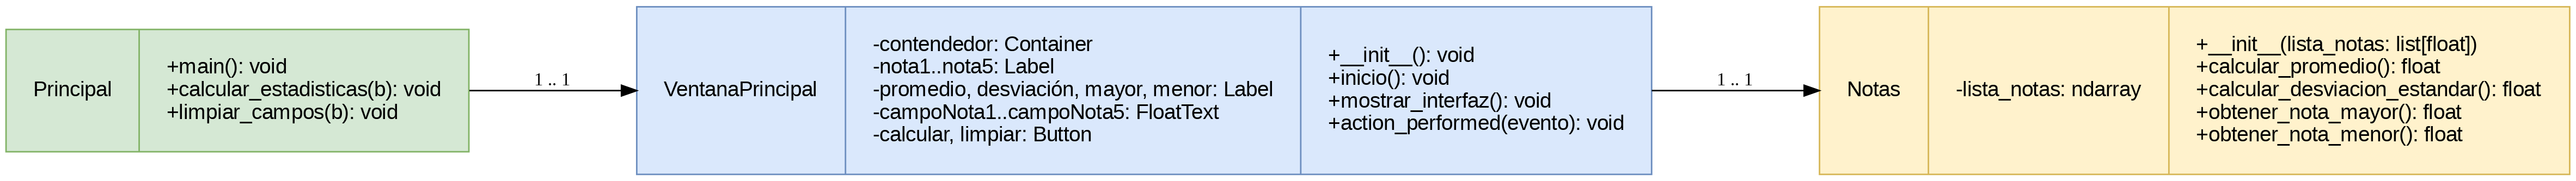

In [ ]:
# @title
!apt-get install -y graphviz > /dev/null 2>&1
!pip install graphviz > /dev/null 2>&1

from graphviz import Digraph
from IPython.display import Image, display

# Crear el diagrama base
uml = Digraph('DiagramaNotas', filename='diagrama_notas', format='png')

# Configuración general
uml.attr(
    rankdir='LR',
    fontsize='14',
    fontname='Helvetica',
    ranksep='1.2',
    nodesep='1.0'
)
uml.attr('graph', dpi='200')

# Estilo por defecto para los nodos (se puede omitir si cada nodo tendrá su propio color)
uml.attr('node',
         shape='record',
         style='filled',
         fontname='Helvetica',
         fontsize='14',
         margin='0.25')

# --------------------------------------------------------------
# Clase: Principal
# <<< CAMBIO AQUÍ: Se agregaron los atributos fillcolor y color
# --------------------------------------------------------------
uml.node('Principal', r"""{
Principal|
+main(): void\l
+calcular_estadisticas(b): void\l
+limpiar_campos(b): void\l
}""", fillcolor='#D5E8D4', color='#82B366') # Verde

# --------------------------------------------------------------
# Clase: VentanaPrincipal
# <<< CAMBIO AQUÍ: Se agregaron los atributos fillcolor y color
# --------------------------------------------------------------
uml.node('VentanaPrincipal', r"""{
VentanaPrincipal|
-contendedor: Container\l
-nota1..nota5: Label\l
-promedio, desviación, mayor, menor: Label\l
-campoNota1..campoNota5: FloatText\l
-calcular, limpiar: Button\l
|
+__init__(): void\l
+inicio(): void\l
+mostrar_interfaz(): void\l
+action_performed(evento): void\l
}""", fillcolor='#DAE8FC', color='#6C8EBF') # Azul

# --------------------------------------------------------------
# Clase: Notas
# <<< CAMBIO AQUÍ: Se agregaron los atributos fillcolor y color
# --------------------------------------------------------------
uml.node('Notas', r"""{
Notas|
-lista_notas: ndarray\l
|
+__init__(lista_notas: list[float])\l
+calcular_promedio(): float\l
+calcular_desviacion_estandar(): float\l
+obtener_nota_mayor(): float\l
+obtener_nota_menor(): float\l
}""", fillcolor='#FFF2CC', color='#D6B656') # Amarillo

# --------------------------------------------------------------
# Relaciones
# --------------------------------------------------------------
uml.edge('Principal', 'VentanaPrincipal', label='1 .. 1', fontsize='12')
uml.edge('VentanaPrincipal', 'Notas', label='1 .. 1', fontsize='12')

# --------------------------------------------------------------
# Generar y mostrar
# --------------------------------------------------------------
uml.render(cleanup=True)
display(Image(filename='diagrama_notas.png'))

# Diagrama de usos

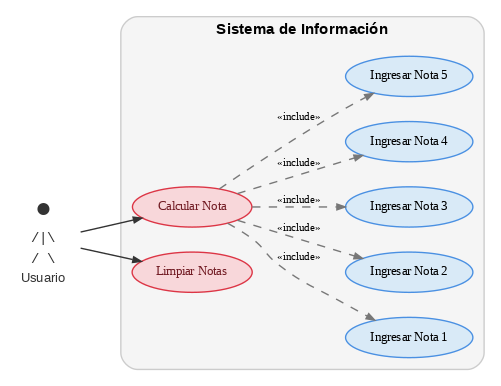

In [ ]:
# @title
!apt-get install -y graphviz > /dev/null 2>&1
!pip install graphviz > /dev/null 2>&1
from graphviz import Digraph
from IPython.display import Image, display
use_case = Digraph('CasosDeUso', filename='casos_uso_notas_color', format='png')
use_case.attr(
    rankdir='LR',
    dpi='100',
    fontname='Helvetica'
)
actor_svg = '''<
<TABLE BORDER="0" CELLBORDER="0" CELLSPACING="0">
  <TR><TD><FONT POINT-SIZE="20" COLOR="#333333">●</FONT></TD></TR>
  <TR><TD><FONT FACE="monospace" POINT-SIZE="10" COLOR="#333333"> /|\\ </FONT></TD></TR>
  <TR><TD><FONT FACE="monospace" POINT-SIZE="10" COLOR="#333333"> / \\ </FONT></TD></TR>
  <TR><TD><FONT FACE="Helvetica" POINT-SIZE="9" COLOR="#333333">Usuario</FONT></TD></TR>
</TABLE>>'''
use_case.node('actor', actor_svg, shape='plaintext')
with use_case.subgraph(name='cluster_sistema') as sistema:
    sistema.attr(
        label='Sistema de Información',
        fontsize='11',
        fontname='Helvetica-Bold',
        style='filled,rounded',
        color='#CCCCCC',
        fillcolor='#F5F5F5'
    )
    sistema.attr(
        'node',
        shape='ellipse',
        style='filled',
        fillcolor='#D9EAF7',
        color='#4A90E2',
        fontcolor='#000000',
        fontsize='9',
        width='1.2',
        height='0.4'
    )
    sistema.node(
        'calcular',
        'Calcular Nota',
        fillcolor='#F8D7DA',  # Rojo claro de fondo
        color='#DC3545',      # Borde rojo
        fontcolor='#721C24'   # Texto rojo oscuro
    )
    sistema.node(
        'limpiar',
        'Limpiar Notas',
        fillcolor='#F8D7DA',  # Rojo claro de fondo
        color='#DC3545',      # Borde rojo
        fontcolor='#721C24'   # Texto rojo oscuro
    )
    for i in range(1, 6):
        sistema.node(f'nota{i}', f'Ingresar Nota {i}')
use_case.edge('actor', 'calcular', color='#333333', arrowsize='0.6')
use_case.edge('actor', 'limpiar', color='#333333', arrowsize='0.6')
for i in range(1, 6):
    use_case.edge('calcular', f'nota{i}',
                  label='«include»',
                  fontsize='8',
                  color='#777777',
                  style='dashed',
                  arrowsize='0.6')
use_case.render(cleanup=True)
display(Image(filename='casos_uso_notas_color.png'))

# Ejercicio 8.3 pagina 495 (Texto: Ejercicios de programación)

**Enunciado: Persona**

Se requiere desarrollar un programa con interfaz gráfica de usuario que permita calcular el volumen y superficie de varias figuras geométricas. Las figuras geométricas son el cilindro, la esfera y la pirámide.

- Para el cilindro se solicitan su radio y altura (en centímetros).

- Para la esfera, su radio (en centímetros).

- Para la pirámide, su base, altura y apotema (en centímetros).

Una vez ingresados estos datos, el programa calcula el volumen y superficie de cada figura. Para desarrollar el programa se debe crear una jerarquía de clases para las diferentes figuras geométricas requeridas.



In [ ]:
import ipywidgets as widgets
from IPython.display import display, HTML
import math

# -----------------------------------------------------------------
# 1. JERARQUÍA DE CLASES (LÓGICA POO)
# -----------------------------------------------------------------

class FiguraGeometrica:
    """Clase base para las figuras."""
    def __init__(self):
        pass

    def calcular_volumen(self):
        raise NotImplementedError("Este método debe ser implementado por la subclase.")

    def calcular_superficie(self):
        raise NotImplementedError("Este método debe ser implementado por la subclase.")

class Cilindro(FiguraGeometrica):
    def __init__(self, radio, altura):
        super().__init__()
        self.radio = radio
        self.altura = altura

    def calcular_volumen(self):
        return math.pi * (self.radio ** 2) * self.altura

    def calcular_superficie(self):
        area_lateral = 2 * math.pi * self.radio * self.altura
        area_bases = 2 * math.pi * (self.radio ** 2)
        return area_lateral + area_bases

class Esfera(FiguraGeometrica):
    def __init__(self, radio):
        super().__init__()
        self.radio = radio

    def calcular_volumen(self):
        return (4/3) * math.pi * (self.radio ** 3)

    def calcular_superficie(self):
        return 4 * math.pi * (self.radio ** 2)

class Piramide(FiguraGeometrica):
    def __init__(self, base, altura, apotema):
        super().__init__()
        self.base = base
        self.altura = altura
        self.apotema = apotema

    def calcular_volumen(self):
        return ((self.base ** 2) * self.altura) / 3

    def calcular_superficie(self):
        area_base = self.base ** 2
        area_lateral = 2 * self.base * self.apotema
        return area_base + area_lateral

# -----------------------------------------------------------------
# 2. LÓGICA DE LA INTERFAZ GRÁFICA (Widgets)
# -----------------------------------------------------------------

# Estilos comunes
estilo_label = widgets.Layout(width='120px')
layout_campo = widgets.Layout(width='150px')

# Contenedor principal que simulará el cambio de ventanas
ventana_principal_output = widgets.Output()

def crear_interfaz_cilindro():
    """Crea y devuelve los widgets para la ventana del Cilindro."""
    # CORRECCIÓN: Usar widgets.HTML en lugar de HTML
    titulo = widgets.HTML("<h3>Cilindro</h3>")
    radio_in = widgets.FloatText(description="Radio (cms):", style={'description_width': 'initial'}, layout=layout_campo)
    altura_in = widgets.FloatText(description="Altura (cms):", style={'description_width': 'initial'}, layout=layout_campo)
    volumen_out = widgets.Label(value="Volumen (cm3): -")
    superficie_out = widgets.Label(value="Superficie (cm2): -")
    calcular_btn = widgets.Button(description="Calcular", button_style='success')

    def on_calculate_clicked(b):
        try:
            cilindro = Cilindro(radio_in.value, altura_in.value)
            volumen_out.value = f"Volumen (cm3): {cilindro.calcular_volumen():.2f}"
            superficie_out.value = f"Superficie (cm2): {cilindro.calcular_superficie():.2f}"
        except:
            volumen_out.value = "Volumen (cm3): Error"
            superficie_out.value = "Superficie (cm2): Error"

    calcular_btn.on_click(on_calculate_clicked)
    return widgets.VBox([titulo, radio_in, altura_in, calcular_btn, volumen_out, superficie_out])

def crear_interfaz_esfera():
    """Crea y devuelve los widgets para la ventana de la Esfera."""
    # CORRECCIÓN: Usar widgets.HTML en lugar de HTML
    titulo = widgets.HTML("<h3>Esfera</h3>")
    radio_in = widgets.FloatText(description="Radio (cms):", style={'description_width': 'initial'}, layout=layout_campo)
    volumen_out = widgets.Label(value="Volumen (cm3): -")
    superficie_out = widgets.Label(value="Superficie (cm2): -")
    calcular_btn = widgets.Button(description="Calcular", button_style='success')

    def on_calculate_clicked(b):
        try:
            esfera = Esfera(radio_in.value)
            volumen_out.value = f"Volumen (cm3): {esfera.calcular_volumen():.2f}"
            superficie_out.value = f"Superficie (cm2): {esfera.calcular_superficie():.2f}"
        except:
            volumen_out.value = "Volumen (cm3): Error"
            superficie_out.value = "Superficie (cm2): Error"

    calcular_btn.on_click(on_calculate_clicked)
    return widgets.VBox([titulo, radio_in, calcular_btn, volumen_out, superficie_out])

def crear_interfaz_piramide():
    """Crea y devuelve los widgets para la ventana de la Pirámide."""
    # CORRECCIÓN: Usar widgets.HTML en lugar de HTML
    titulo = widgets.HTML("<h3>Pirámide</h3>")
    base_in = widgets.FloatText(description="Base (cms):", style={'description_width': 'initial'}, layout=layout_campo)
    altura_in = widgets.FloatText(description="Altura (cms):", style={'description_width': 'initial'}, layout=layout_campo)
    apotema_in = widgets.FloatText(description="Apotema (cms):", style={'description_width': 'initial'}, layout=layout_campo)
    volumen_out = widgets.Label(value="Volumen (cm3): -")
    superficie_out = widgets.Label(value="Superficie (cm2): -")
    calcular_btn = widgets.Button(description="Calcular", button_style='success')

    def on_calculate_clicked(b):
        try:
            piramide = Piramide(base_in.value, altura_in.value, apotema_in.value)
            volumen_out.value = f"Volumen (cm3): {piramide.calcular_volumen():.2f}"
            superficie_out.value = f"Superficie (cm2): {piramide.calcular_superficie():.2f}"
        except:
            volumen_out.value = "Volumen (cm3): Error"
            superficie_out.value = "Superficie (cm2): Error"

    calcular_btn.on_click(on_calculate_clicked)
    return widgets.VBox([titulo, base_in, altura_in, apotema_in, calcular_btn, volumen_out, superficie_out])

# -----------------------------------------------------------------
# 3. MENÚ PRINCIPAL Y EJECUCIÓN
# -----------------------------------------------------------------

# Crear botones del menú principal
btn_cilindro = widgets.Button(description="Cilindro")
btn_esfera = widgets.Button(description="Esfera")
btn_piramide = widgets.Button(description="Pirámide")
menu_principal = widgets.HBox([btn_cilindro, btn_esfera, btn_piramide])

# Funciones para mostrar cada "ventana"
def mostrar_cilindro(b):
    with ventana_principal_output:
        ventana_principal_output.clear_output()
        display(crear_interfaz_cilindro())

def mostrar_esfera(b):
    with ventana_principal_output:
        ventana_principal_output.clear_output()
        display(crear_interfaz_esfera())

def mostrar_piramide(b):
    with ventana_principal_output:
        ventana_principal_output.clear_output()
        display(crear_interfaz_piramide())

# Asociar botones del menú a las funciones
btn_cilindro.on_click(mostrar_cilindro)
btn_esfera.on_click(mostrar_esfera)
btn_piramide.on_click(mostrar_piramide)

# Mostrar la interfaz inicial
titulo_principal = HTML("<h2>Figuras Geométricas</h2>")
display(titulo_principal, menu_principal, ventana_principal_output)

Output()

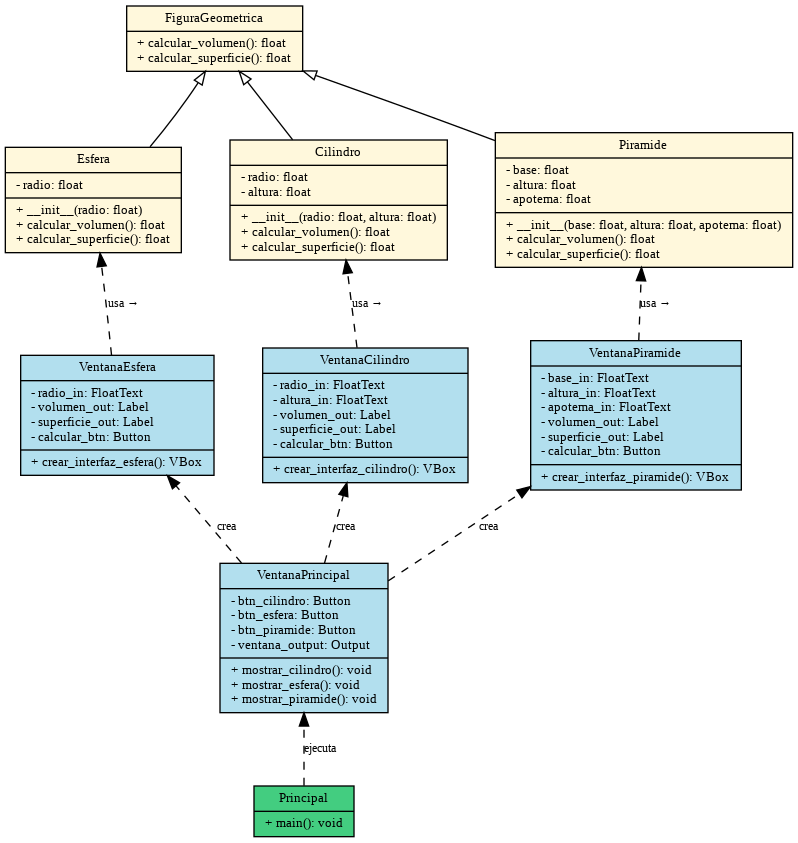

In [ ]:
# @title
# ============================================================
# DIAGRAMA UML DEFINITIVO - "FIGURAS GEOMÉTRICAS"
# ============================================================

!apt-get install -y graphviz > /dev/null 2>&1
!pip install graphviz > /dev/null 2>&1

from graphviz import Digraph
from IPython.display import Image, display

g = Digraph('DiagramaFiguras', filename='diagrama_figuras', format='png')
# CORRECCIÓN: Se reduce ranksep para hacer las flechas más cortas
g.attr(rankdir='TB', fontsize='11', nodesep='0.5', ranksep='0.6')
g.attr('node', shape='record', style='filled', fillcolor='cornsilk', fontsize='10')
g.attr('edge', fontsize='9')

# -----------------------------------------------------------------
# SECCIÓN 1: Clases de Lógica (Modelo)
# -----------------------------------------------------------------
g.node('FiguraGeometrica', r'''{FiguraGeometrica|+ calcular_volumen(): float\l+ calcular_superficie(): float\l}''')
g.node('Cilindro', r'''{Cilindro|- radio: float\l- altura: float\l|+ __init__(radio: float, altura: float)\l+ calcular_volumen(): float\l+ calcular_superficie(): float\l}''')
g.node('Esfera', r'''{Esfera|- radio: float\l|+ __init__(radio: float)\l+ calcular_volumen(): float\l+ calcular_superficie(): float\l}''')
g.node('Piramide', r'''{Piramide|- base: float\l- altura: float\l- apotema: float\l|+ __init__(base: float, altura: float, apotema: float)\l+ calcular_volumen(): float\l+ calcular_superficie(): float\l}''')

# -----------------------------------------------------------------
# SECCIÓN 2: Clases de Interfaz (Vista)
# -----------------------------------------------------------------
g.node('VentanaCilindro', r'''{VentanaCilindro|- radio_in: FloatText\l- altura_in: FloatText\l- volumen_out: Label\l- superficie_out: Label\l- calcular_btn: Button\l|+ crear_interfaz_cilindro(): VBox\l}''', fillcolor='lightblue2')
g.node('VentanaEsfera', r'''{VentanaEsfera|- radio_in: FloatText\l- volumen_out: Label\l- superficie_out: Label\l- calcular_btn: Button\l|+ crear_interfaz_esfera(): VBox\l}''', fillcolor='lightblue2')
g.node('VentanaPiramide', r'''{VentanaPiramide|- base_in: FloatText\l- altura_in: FloatText\l- apotema_in: FloatText\l- volumen_out: Label\l- superficie_out: Label\l- calcular_btn: Button\l|+ crear_interfaz_piramide(): VBox\l}''', fillcolor='lightblue2')
g.node('VentanaPrincipal', r'''{VentanaPrincipal|- btn_cilindro: Button\l- btn_esfera: Button\l- btn_piramide: Button\l- ventana_output: Output\l|+ mostrar_cilindro(): void\l+ mostrar_esfera(): void\l+ mostrar_piramide(): void\l}''', fillcolor='lightblue2')
g.node('Principal', r'''{Principal|+ main(): void\l}''', fillcolor='seagreen3')

# -----------------------------------------------------------------
# SECCIÓN 3: Relaciones entre Nodos
# -----------------------------------------------------------------
# Herencia
g.edge('Cilindro', 'FiguraGeometrica', arrowhead='empty')
g.edge('Esfera', 'FiguraGeometrica', arrowhead='empty')
g.edge('Piramide', 'FiguraGeometrica', arrowhead='empty')
# Uso (Lógica <-> Interfaz)
g.edge('VentanaCilindro', 'Cilindro', label='usa →', style='dashed')
g.edge('VentanaEsfera', 'Esfera', label='usa →', style='dashed')
g.edge('VentanaPiramide', 'Piramide', label='usa →', style='dashed')
# Composición (Interfaz)
g.edge('VentanaPrincipal', 'VentanaCilindro', label='crea', style='dashed')
g.edge('VentanaPrincipal', 'VentanaEsfera', label='crea', style='dashed')
g.edge('VentanaPrincipal', 'VentanaPiramide', label='crea', style='dashed')
g.edge('Principal', 'VentanaPrincipal', label='ejecuta', style='dashed')

# -----------------------------------------------------------------
# SECCIÓN 4: CONTROL DE LAYOUT
# -----------------------------------------------------------------
# Se agrupan nodos en el mismo nivel horizontal (rank)
with g.subgraph() as s:
    s.attr(rank='same')
    s.node('Cilindro'); s.node('Esfera'); s.node('Piramide')

with g.subgraph() as s:
    s.attr(rank='same')
    s.node('VentanaCilindro'); s.node('VentanaEsfera'); s.node('VentanaPiramide')

# Se fuerza el orden vertical con una "cadena" de flechas invisibles
g.edge('FiguraGeometrica', 'Esfera', style='invis')
g.edge('Esfera', 'VentanaEsfera', style='invis')
g.edge('VentanaEsfera', 'VentanaPrincipal', style='invis')
g.edge('VentanaPrincipal', 'Principal', style='invis')

# -----------------------------------------------------------------
# Render y visualización
# -----------------------------------------------------------------
g.render(cleanup=True)
display(Image(filename='diagrama_figuras.png'))

# Diagrama de usos

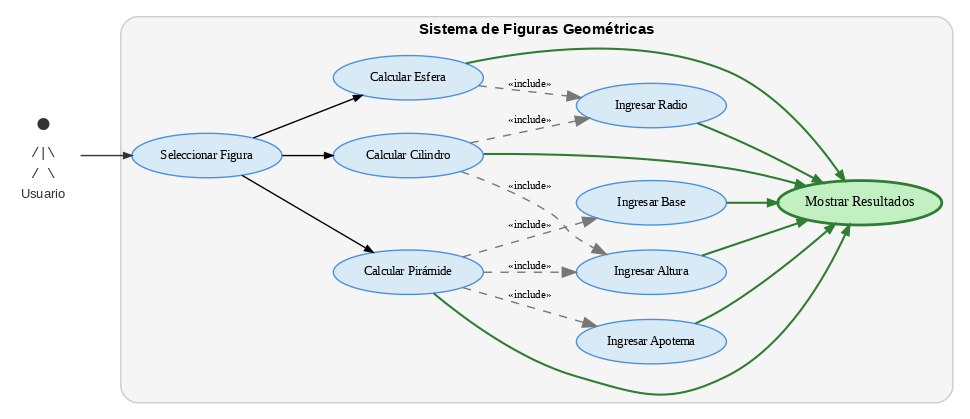

In [ ]:
# --------------------------------------------------------------
# DIAGRAMA DE CASOS DE USO CON NODO FINAL ("Mostrar Resultados")
# Sistema de Figuras Geométricas
# --------------------------------------------------------------

!apt-get install -y graphviz > /dev/null 2>&1
!pip install graphviz > /dev/null 2>&1

from graphviz import Digraph
from IPython.display import Image, display

use_case = Digraph('CasosDeUso', filename='casos_uso_figuras_final', format='png')

# Configuración general
use_case.attr(
    rankdir='LR',
    dpi='100',
    fontname='Helvetica'
)

# --------------------------------------------------------------
# Actor (stickman)
# --------------------------------------------------------------
actor_svg = '''<
<TABLE BORDER="0" CELLBORDER="0" CELLSPACING="0">
  <TR><TD><FONT POINT-SIZE="20" COLOR="#333333">●</FONT></TD></TR>
  <TR><TD><FONT FACE="monospace" POINT-SIZE="10" COLOR="#333333"> /|\\ </FONT></TD></TR>
  <TR><TD><FONT FACE="monospace" POINT-SIZE="10" COLOR="#333333"> / \\ </FONT></TD></TR>
  <TR><TD><FONT FACE="Helvetica" POINT-SIZE="9" COLOR="#333333">Usuario</FONT></TD></TR>
</TABLE>>'''
use_case.node('actor', actor_svg, shape='plaintext')

# --------------------------------------------------------------
# Subgrafo del sistema
# --------------------------------------------------------------
with use_case.subgraph(name='cluster_sistema') as sistema:
    sistema.attr(
        label='Sistema de Figuras Geométricas',
        fontsize='11',
        fontname='Helvetica-Bold',
        style='filled,rounded',
        color='#CCCCCC',
        fillcolor='#F5F5F5'
    )

    sistema.attr(
        'node',
        shape='ellipse',
        style='filled',
        fillcolor='#D9EAF7',
        color='#4A90E2',
        fontcolor='#000000',
        fontsize='9',
        width='1.5',
        height='0.45'
    )

    # Casos de uso principales
    sistema.node('seleccionar', 'Seleccionar Figura')
    sistema.node('pirámide', 'Calcular Pirámide')
    sistema.node('cilindro', 'Calcular Cilindro')
    sistema.node('esfera', 'Calcular Esfera')

    # Casos de ingreso de datos
    sistema.node('apotema', 'Ingresar Apotema')
    sistema.node('base', 'Ingresar Base')
    sistema.node('altura', 'Ingresar Altura')
    sistema.node('radio', 'Ingresar Radio')

    # Nodo final (Mostrar Resultados)
    sistema.node('resultado', 'Mostrar Resultados',
                 fillcolor='#C2F0C2',
                 color='#2E7D32',
                 style='filled,bold',
                 fontsize='10')

# --------------------------------------------------------------
# Relaciones principales
# --------------------------------------------------------------
use_case.edge('actor', 'seleccionar', color='#333333', arrowsize='0.6')
use_case.edge('seleccionar', 'pirámide', arrowsize='0.6')
use_case.edge('seleccionar', 'cilindro', arrowsize='0.6')
use_case.edge('seleccionar', 'esfera', arrowsize='0.6')

# Relaciones de cálculo hacia sus datos
use_case.edge('pirámide', 'apotema', label='«include»', style='dashed', color='#777777', fontsize='8')
use_case.edge('pirámide', 'base', label='«include»', style='dashed', color='#777777', fontsize='8')
use_case.edge('pirámide', 'altura', label='«include»', style='dashed', color='#777777', fontsize='8')

use_case.edge('cilindro', 'radio', label='«include»', style='dashed', color='#777777', fontsize='8')
use_case.edge('cilindro', 'altura', label='«include»', style='dashed', color='#777777', fontsize='8')

use_case.edge('esfera', 'radio', label='«include»', style='dashed', color='#777777', fontsize='8')

# --------------------------------------------------------------
# NUEVA PARTE: Nodo final conectado a todos
# --------------------------------------------------------------
# Todas las figuras y los datos apuntan a "Mostrar Resultados"
for n in ['pirámide', 'cilindro', 'esfera', 'radio', 'altura', 'apotema', 'base']:
    use_case.edge(n, 'resultado', color='#2E7D32', arrowsize='0.7', penwidth='1.5')

# --------------------------------------------------------------
# Renderizar y mostrar
# --------------------------------------------------------------
use_case.render(cleanup=True)
display(Image(filename='casos_uso_figuras_final.png'))
